In [306]:
# %load batch_data_generator.py
'''
The purpose of this file is to use Python to make the images to train AI models with.

Dependencies: python 3.6.2, numpy, matplotlib, pillow

Python is a bit more accessible than Matlab; therefore, this file will be better for
making training images in the long run.
'''


from PIL import Image, ImageFont, ImageDraw
import matplotlib.pyplot as plt
from os.path import isfile, join
from os import listdir
import os
from random import randint
import numpy as np

%matplotlib inline

# load necessary files
cwd = os.getcwd()
backgrounds_path = join(cwd, 'backgrounds')
backgrounds = [f for f in listdir(backgrounds_path) if isfile(join(backgrounds_path, f))]
backgrounds_raw = []
for files in backgrounds:
    im = Image.open(join(backgrounds_path,files))
    im = im.convert('RGB')
    backgrounds_raw.append(im)

shapes_path = join(cwd, 'assets', 'shape_templates')
shapes = [f for f in listdir(shapes_path) if isfile(join(shapes_path, f))]
shapes_raw = []
for files in shapes:
    im = Image.open(join(shapes_path,files))
    im = im.convert('RGB')
    shapes_raw.append(im)


alphanumeric_vector = ['A', 'B', 'C', 'D', 'E', 'F', \
                       'G', 'H', 'I', 'J', 'K', 'L', \
                       'M', 'N', 'O', 'P', 'Q', 'R', \
                       'S', 'T', 'U', 'V', 'W', 'X', \
                       'Y', 'Z', '1', '2', '3', '4', \
                       '5', '6', '7', '8', '9']


# choose random alphanumeric and background
letter = alphanumeric_vector[randint(0,len(alphanumeric_vector)-1)]
background = backgrounds_raw[randint(0,len(backgrounds)-1)]
shape = shapes_raw[randint(0,len(shapes)-1)]

# choose random color
color_of_background = np.array([randint(0,255),randint(0,255),randint(0,255)])
color_of_letter =     np.array([randint(0,255),randint(0,255),randint(0,255)])
color_difference = np.sqrt(np.sum(np.square(color_of_background-color_of_letter)))
# make sure the color difference is greater than 7
while color_difference < 7:
    color_of_letter = np.array([randint(0,255),randint(0,255),randint(0,255)])
    color_difference = np.sqrt(np.sum(np.square(color_of_background-color_of_letter)))


# rgb to rgba converter
def rgb_to_rgba(colors):
    '''
    converts rgb to rgba
    colors is a list of [R, G, B] integers
    returns [R, G, B, A]
    '''
    smallest_color = min(colors)
    alpha = (255-smallest_color)/255
    R = (colors[0]-smallest_color)/alpha
    G = (colors[1]-smallest_color)/alpha
    B = (colors[2]-smallest_color)/alpha
    return (222,223,224,225)
    
    
# simpy add a random  to 
im = shape
draw = ImageDraw.Draw(im)
font_path = join(cwd, "fonts", "Arial.ttf")
font_size = 22
font = ImageFont.truetype(font_path, font_size)
rgba_color = tuple(color_of_letter.tolist() + [0])
draw.text((12, 10), letter, font=font, fill=rgba_color)


# create xml files





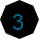

In [307]:
im

In [311]:
background.paste(shape, (0,0))

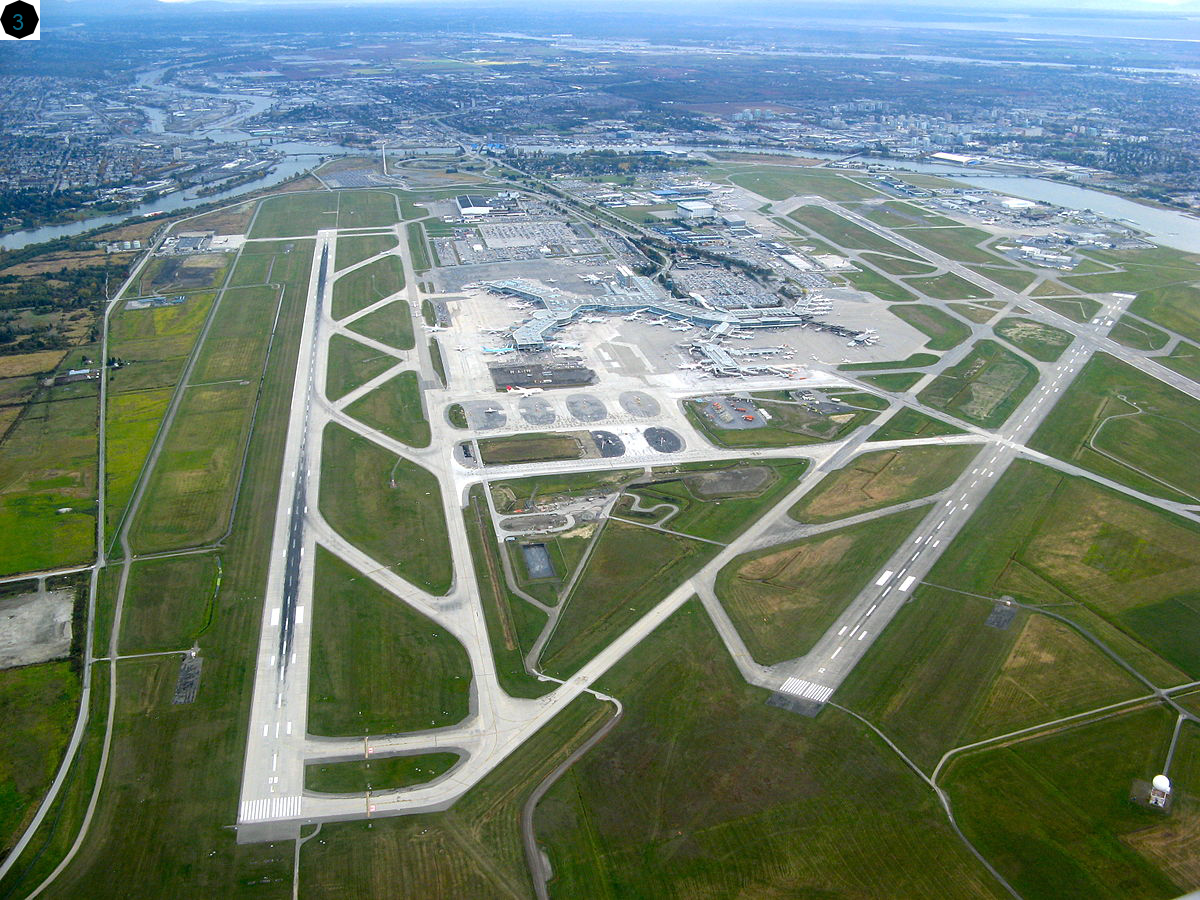

In [312]:
background